In [402]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [404]:
weather_ds = pd.read_csv("C:\\Users\\user\\Documents\\Weather_Prediction\\dataset\\weather.csv", index_col="date", parse_dates=True)

In [406]:
weather_ds

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m�),PAR (�mol/m�/s),max. PAR (�mol/m�/s),Tlog (degC),OT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,5.89,...,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,433.0
2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,6.05,...,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,439.6
2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,5.93,...,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,435.2


In [408]:
print(type(weather_ds))

<class 'pandas.core.frame.DataFrame'>


In [410]:
#This shows us the number of null values in each colum but from what is shown, there are none
weather_ds.apply(pd.isnull).sum()/weather_ds.shape[0]

p (mbar)                0.0
T (degC)                0.0
Tpot (K)                0.0
Tdew (degC)             0.0
rh (%)                  0.0
VPmax (mbar)            0.0
VPact (mbar)            0.0
VPdef (mbar)            0.0
sh (g/kg)               0.0
H2OC (mmol/mol)         0.0
rho (g/m**3)            0.0
wv (m/s)                0.0
max. wv (m/s)           0.0
wd (deg)                0.0
rain (mm)               0.0
raining (s)             0.0
SWDR (W/m�)             0.0
PAR (�mol/m�/s)         0.0
max. PAR (�mol/m�/s)    0.0
Tlog (degC)             0.0
OT                      0.0
dtype: float64

Because of this our dataset is already clean and thus we skip that step of data cleaning.

In [413]:
#Visualising the datatype in column
weather_ds.dtypes

p (mbar)                float64
T (degC)                float64
Tpot (K)                float64
Tdew (degC)             float64
rh (%)                  float64
VPmax (mbar)            float64
VPact (mbar)            float64
VPdef (mbar)            float64
sh (g/kg)               float64
H2OC (mmol/mol)         float64
rho (g/m**3)            float64
wv (m/s)                float64
max. wv (m/s)           float64
wd (deg)                float64
rain (mm)               float64
raining (s)             float64
SWDR (W/m�)             float64
PAR (�mol/m�/s)         float64
max. PAR (�mol/m�/s)    float64
Tlog (degC)             float64
OT                      float64
dtype: object

In [415]:
weather_ds.index

DatetimeIndex(['2020-01-01 00:10:00', '2020-01-01 00:20:00',
               '2020-01-01 00:30:00', '2020-01-01 00:40:00',
               '2020-01-01 00:50:00', '2020-01-01 01:00:00',
               '2020-01-01 01:10:00', '2020-01-01 01:20:00',
               '2020-01-01 01:30:00', '2020-01-01 01:40:00',
               ...
               '2020-12-31 22:30:00', '2020-12-31 22:40:00',
               '2020-12-31 22:50:00', '2020-12-31 23:00:00',
               '2020-12-31 23:10:00', '2020-12-31 23:20:00',
               '2020-12-31 23:30:00', '2020-12-31 23:40:00',
               '2020-12-31 23:50:00', '2021-01-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=52696, freq=None)

In [417]:
weather_ds.apply(lambda x: (x == 9999).sum())

p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m�)             0
PAR (�mol/m�/s)         0
max. PAR (�mol/m�/s)    0
Tlog (degC)             0
OT                      0
dtype: int64

<Axes: xlabel='date'>

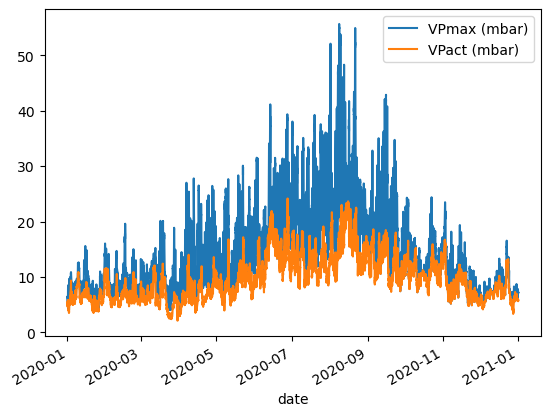

In [419]:
#Analysing the weather data (between the highest and lowest recorded temperature in a day)
weather_ds[["VPmax (mbar)", "VPact (mbar)"]].plot()

<Axes: xlabel='date'>

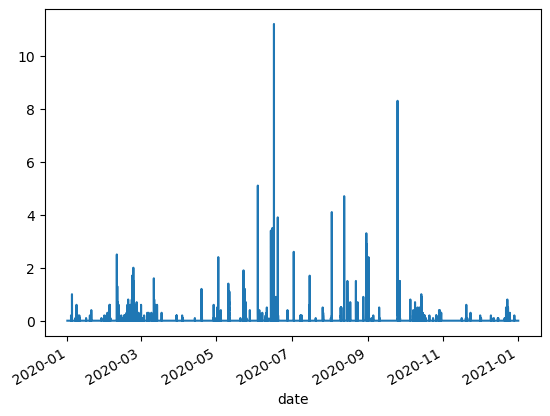

In [421]:
#This shows the amount of rainfall (in mm) per day
weather_ds["rain (mm)"].plot()

In [423]:
print(type(weather_ds))

<class 'pandas.core.frame.DataFrame'>


In [425]:
predictors = ["rain (mm)","VPmax (mbar)", "VPact (mbar)"]

In [427]:
# Define features (X) and target (y)
X = weather_ds.drop(columns=predictors, errors='ignore')  # Drop target columns to get features
y = weather_ds[predictors]  # Select target columns only

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [431]:
#Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [433]:
# Make predictions
y_pred = model.predict(X_test)

In [435]:
# Evaluate the model using MAE, MSE, and R²
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.014660716449411004
Mean Squared Error (MSE): 0.0027690363457815747
R-squared (R²): 0.7402848048885247


In [437]:
# Optionally, print the model coefficients
print("\nModel coefficients:")
print(model.coef_)


Model coefficients:
[[ 1.03283878e-03 -3.83511753e-02  4.56479259e-02 -3.24898709e-03
   2.97322561e-04 -3.04408530e-03  2.63295831e-01 -1.62767649e-01
   2.11349958e-03  2.33153962e-05  3.65149994e-03  3.00440774e-05
   4.51451972e-04  3.46076932e-04 -1.87970555e-04 -1.33463151e-06
   5.85421631e-03  7.43861725e-07]
 [-5.13328018e-02  8.74782486e-01 -9.48015134e-01  1.06780330e-02
  -1.16072884e-03  1.00969433e+00  5.84658573e-01  6.17400332e-01
  -1.42914254e-02 -2.02475403e-06  7.68134939e-04  1.13351696e-05
  -9.84995648e-06 -1.95371989e-05  7.65492502e-06 -1.07447641e-07
   6.53441817e-04  1.81158529e-06]
 [-5.10546477e-02  8.72782730e-01 -9.46735840e-01  1.07487633e-02
  -1.16352097e-03  9.80459013e-03  5.95870528e-01  6.10309112e-01
  -1.44323521e-02 -2.05501390e-06  7.47148963e-04  1.17129296e-05
  -9.80173554e-06 -1.64431399e-05  6.07725510e-06 -6.16790404e-08
   6.55255606e-04  1.83535390e-06]]
